In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Separating linearly unseparable data:

In [2]:
data=[[0,-1,1], [0,0,1], [0,1,1], [1,-1,1], [1,0,1], [1,1,1], [-1,-1,1], [-1,0,1], [-1,1,1],  
    [-3,3,1], [-3,1,1], [-3,0,1], [-3,-1,1], [-3,-3,1], [-1,3,1], [-1,-3,1], 
    [0,3,1], [0,-3,1], [1,3,1], [1,-3,1], [3,3,1], [3,1,1], [3,0,1], [3,-1,1],  
    [3,-3,1], [-2,3,1], [-3,2,1], [-3,-2,1], [-2,-3,1], [2,3,1], [3,2,1], [3,-2,1], [2,-3,1]
]

In [3]:
polar = np.ones((33,3))
def cartopolar(x,y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y , x)
    a = np.array([r,phi])
    return a
cartopolar(data[0][0],data[0][1])[1]

-1.5707963267948966

In [4]:
for i in range(33):
    for j in range(2):
        polar[i][j] = cartopolar(data[i][0],data[i][1])[j]
        #print(polar[i])
X_polar=np.transpose(polar)

In [14]:
X = np.transpose(data)
np.shape(X)

(3, 33)

In [6]:
eksibirler = -1*np.ones(9)
y_d = np.append(eksibirler,np.ones(24))


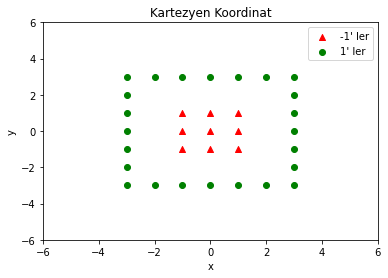

In [7]:
plt.ylim(-6,6)
plt.xlim(-6,6)
plt.scatter(X[0][:np.size(eksibirler)],X[1][:np.size(eksibirler)], color="red", label="-1' ler", marker ="^")
plt.scatter(X[0][np.size(eksibirler):],X[1][np.size(eksibirler):], color="green", label="1' ler", marker ="o")
plt.legend(loc=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kartezyen Koordinat")
plt.show()

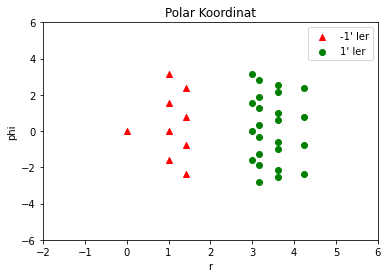

In [8]:
plt.ylim(-6,6)
plt.xlim(-2,6)
plt.scatter(X_polar[0][:np.size(eksibirler)],X_polar[1][:np.size(eksibirler)], color="red", label="-1' ler", marker ="^")
plt.scatter(X_polar[0][np.size(eksibirler):],X_polar[1][np.size(eksibirler):], color="green", label="1' ler", marker ="o")
plt.legend(loc=1)
plt.xlabel("r")
plt.ylabel("phi")
plt.title("Polar Koordinat")
plt.show()

In [9]:
# Genlikte ayrık algılayıcı için bir class oluşturuldu  
# ve gerekli fonksiyonlar eklendi.
class Perceptron(object):
    def __init__ (self, size, c, iteration ):
        # İlk ağırlık : W
        self.W=np.zeros(size)
        self.c = c

    # Aktivasyon fonksiyonu : act()
    def act (self,v):
        return 1 if v >= 0 else -1

    # Öğrenmenin gerçekleştiği döngü , üst limit 500 
    def train (self,X,y_d):
        for _ in range(250):
            for i in range(np.shape(X)[0]):
                v = np.dot(self.W,X[i])
                y = self.act(v)
                self.W = self.W + self.c * (y_d[i]-y) * X[i] 


In [10]:
n = np.shape(data)[1]
c=0.1
perceptron = Perceptron(size=n, c=c, iteration=10)
perceptron.train(X=polar,y_d=y_d)


In [11]:
perceptron.W

array([ 0.72951181,  0.06435011, -1.4       ])

In [12]:
# POLAR KOORDİNATTA YAZ
r_cor = perceptron.W[0]
phi_cor = perceptron.W[1]
const_cor = perceptron.W[2]
const_cor

-1.4

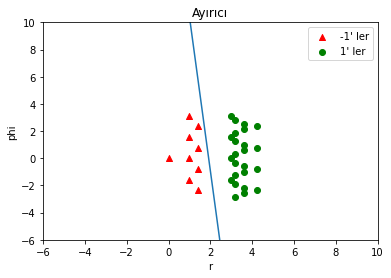

In [13]:

t = np.arange(0.0,4.0,0.01)
s = ((-1 * r_cor * t) - (const_cor))/ phi_cor
plt.ylim(-6,10)
plt.xlim(-6,10)
plt.plot(t,s)
plt.scatter(X_polar[0][:np.size(eksibirler)],X_polar[1][:np.size(eksibirler)], color="red", label="-1' ler", marker ="^")
plt.scatter(X_polar[0][np.size(eksibirler):],X_polar[1][np.size(eksibirler):], color="green", label="1' ler", marker ="o")
plt.legend(loc=1)
plt.xlabel("r")
plt.ylabel("phi")
plt.title("Ayırıcı")
plt.show()